# Machine Learning Engineer Nanodegree
***
## Capstone Project -
Credit Card Default Prediction in Taiwan
***
Ka Pang(Sammy) Yu  
Janurary 5th, 2018

## I. Definition
***

### Project Overview

#### Background  --
In the mid of 2000, the credit card issuers in Taiwan faced the cash and credit card debt crisis; and the
delinquency got to the peak in the third quarter of 2006. In order to increase market share, card-issuing banks in
Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders,
irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and
cash card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both
banks and cardholders (I-Cheng Yeh, Che-hui Lien, 2009).
In order to reduce the risk of default, we can develop machine learning models to predict whether an individual
would default based on the clients’ information such as the clients’ personal information, their financial
statements and repayment records, etc.
  
#### Dataset  --
The dataset which is in Excel Spreadsheet format is obtained from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) and the author is I-Cheng Yeh.
According to professor Yeh in his paper “The comparisons of data mining techniques for the predictive accuracy
of probability of default of credit card clients”, the data was took in October, 2005, from an important bank (a
cash and credit card issuer) in Taiwan and the targets were credit card holders of the bank. Among the total 
30,000 observations, 6636 observations (22.12%) are the cardholders with default payment. The research
employed a binary variable – default payment (Yes = 1, No = 0), as the response variable.  
  
### Problem Statement
The problem I want to solve in this project is predicting whether a credit card holder would default of repaying
his/her credit card balance. Solving this problem can help the credit card issuers to consider if they should issue
their credit cards to this type of customers or consider if they should suspend some existing cards before the
clients start accumulating a huge amount of unpaid balance in their accounts and become unable to repay. This is
a binary classification problem. The predicting result is either “Defaulted” (1) or “Not Defaulted” (0).  
  
To solve this problem, there are several steps I would need to go through. First, I will do a data exploration on the data such as taking a glance at its structure and some statistics of each feature, finding the abnormalities in the data, and plotting some graphs for the typical features. Then I preprocess the data to make it clean and tidy for the later model training. The preprocessing steps include data transformation and encoding, outliers removal, feature scaling, dimensionality reduction and data balancing. Once the data is clean, it is used for training four different classification algorithms, namely, **Decision Tree**, **Support Vector Machine (SVM)**, **Gradient Tree Boosting** and **Neural Networks**. These four algorithms have different characteristics. So hopefully at least one of them work well on this dataset. The algorthems are initially trained using the default parameters so that I can get a quick evaluation on each one of them. After that, one is selected based on their performance in the metrics. The selected one will be fine-tuned for an optimised model. The final model will be tested again using an unseen test set to make sure it generalizes well enough for the future data.   

### Metrics
Since this is a binary classification problem, the following metrics will be used to evaluate the solution models:
* Accuracy – the percentage of correct default cases those were correctly predicted by the classifier.
* F-beta score – Accuracy is a good metric, but it might not quite usuful when one class of label dominates the data (i.e. the "Not Defaulted" class in this dataset). F-beta score is a harmonic mean of precision and recall which doesn't take the True Negative observations (the dominated True "Not Defaulted" ones in this case) into account. So it's a score we want to use for meausuring how good a model can predict for the True Defaulted clients. The value is between 0 and 1. A good model would have a higher score.
* ROC (Receiver operating characteristic) curve – similary, a ROC curve plots the trade-off between the True Positive Rate and False Positive Rate without using the dominated True Negative Rate (True "Not Defaulted"). So it is a good metric for this dataset. A ROC curve is to be plotted for the final classifier and the area under the curve (AUC) will be calculated. 100% of AUC-ROC is the perfect score, while under 50% is considered a failure.



## II. Analysis

### Data Exploration

#### Input Features and Response Variable --
There are totally 23 input features or variables (**X1-X23**) and 1 response variable (**Y**) in the dataset. Their details are listed below: 
  
**X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family
(supplementary) credit.  
**X2**: Gender (1 = male; 2 = female).  
**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
**X4**: Marital status (1 = married; 2 = single; 3 = others).  
**X5**: Age (year).  
**X6-X11**: History of past payment. We tracked the past monthly payment records (from April to September,
2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,
2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment
delay for eight months; 9 = payment delay for nine months and above.  
**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 =
amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.  
**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount
paid in August, 2005; . . .;X23 = amount paid in April, 2005.  
**Y**: Reponse variable (1 = Defaulted; 0 = Not Defaulted)  
  
As you can see, feature **X1,X5,X12-X23** are numeric continuous variables; while feature **X2-X4,X6-X11** are categorial variables.  

In [1]:
import pandas as pd

## Loading Data

# skip the second row which is the descriptions of the columns
data = pd.read_excel(io='https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',sheet_name='Data', skiprows=[1])

#### Data Summary --
Here we show the first few rows of the dataset for a glance of the data. Then we rename the dataset columns to make them more meaningful and readable. And finally we show the statistics for each feature.

In [2]:
from IPython.display import display 
# Pretty display for notebooks
%matplotlib inline

# show the first few records after the data is loaded to a dataframe
print("The first 5 rows of the dataset:")
display(data.head())

The first 5 rows of the dataset:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# rename the dataframe columns to be more meanlingful
data = data.rename(index=str, columns={
    'X1':'Credit_Limit',
    'X2':'Gender',
    'X3':'Education',
    'X4':'Marital_Status',
    'X5':'Age',
    'X6':'Repay_Status1',
    'X7':'Repay_Status2',
    'X8':'Repay_Status3',
    'X9':'Repay_Status4',
    'X10':'Repay_Status5',
    'X11':'Repay_Status6',
    'X12':'Bill_Amt1',
    'X13':'Bill_Amt2',
    'X14':'Bill_Amt3',
    'X15':'Bill_Amt4',
    'X16':'Bill_Amt5',
    'X17':'Bill_Amt6',
    'X18':'Pay_Amt1',
    'X19':'Pay_Amt2',
    'X20':'Pay_Amt3',
    'X21':'Pay_Amt4',
    'X22':'Pay_Amt5',
    'X23':'Pay_Amt6',
    'Y':'Defaulted'})

display(data.head(n=1))

,Credit_Limit,Gender,Education,Marital_Status,Age,Repay_Status1,Repay_Status2,Repay_Status3,Repay_Status4,Repay_Status5,...,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Defaulted
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [4]:
## Statistics of the Data

# get the total number of rows in the dataset
n_records = data.shape[0]
# number of records where individual is default
n_default = data[data['Defaulted'] == 1].shape[0]
print("Total number of records: {}".format(n_records))
print("Individuals who default in credit card payment: {}".format(n_default))
print("Percentage of individuals who default in credit card payment: {:.2%}".format(n_default/n_records))
print()

summary = data.describe()
print("Statistics of each feature of the dataset:")
display(summary.iloc[:,0:13])
display(summary.iloc[:,13:])

Total number of records: 30000
Individuals who default in credit card payment: 6636
Percentage of individuals who default in credit card payment: 22.12%

Statistics of each feature of the dataset:


,Credit_Limit,Gender,Education,Marital_Status,Age,Repay_Status1,Repay_Status2,Repay_Status3,Repay_Status4,Repay_Status5,Repay_Status6,Bill_Amt1,Bill_Amt2
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000


,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,Defaulted
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Data Abnormalities and Characteristics --  
  
- **Imbalanced data**  
As you can see the statistics of the dataset above, the percentage of individuals who default in credit card payment is only 22.12%. In this case, the predictions of the classifiers could tend to "Not Defaulted". So some processing steps are needed to make the data be more balanced so that the classifiers can be trained to be more general.
  
- **Unknown Values of 'Education', 'Marital_Status' and 'Repay_Status1' to 'Repay_Status6'**  
The actual values in these columns shown below do not completely match the descriptions of the features dictionary from the dataset. For example, value -2 and 0 do not exist in the dictionary for the repayment status variables. Although we have no information about these unknown values, these columns are categorical variables, so these additional values should not affect the training on the predictive models.

In [5]:
import numpy as np

## Check the Values of Some Categorical Variables
print("Existing values in column Education: {}".format(np.sort(data.Education.unique())))
print("Existing values in column Marital_Status: {}".format(np.sort(data.Marital_Status.unique())))
print("Existing values in column Repay_Status1: {}".format(np.sort(data.Repay_Status1.unique())))
print("Existing values in column Repay_Status2: {}".format(np.sort(data.Repay_Status2.unique())))
print("Existing values in column Repay_Status3: {}".format(np.sort(data.Repay_Status3.unique())))
print("Existing values in column Repay_Status4: {}".format(np.sort(data.Repay_Status4.unique())))
print("Existing values in column Repay_Status5: {}".format(np.sort(data.Repay_Status5.unique())))
print("Existing values in column Repay_Status6: {}".format(np.sort(data.Repay_Status6.unique())))

Existing values in column Education: [0 1 2 3 4 5 6]
Existing values in column Marital_Status: [0 1 2 3]
Existing values in column Repay_Status1: [-2 -1  0  1  2  3  4  5  6  7  8]
Existing values in column Repay_Status2: [-2 -1  0  1  2  3  4  5  6  7  8]
Existing values in column Repay_Status3: [-2 -1  0  1  2  3  4  5  6  7  8]
Existing values in column Repay_Status4: [-2 -1  0  1  2  3  4  5  6  7  8]
Existing values in column Repay_Status5: [-2 -1  0  2  3  4  5  6  7  8]
Existing values in column Repay_Status6: [-2 -1  0  2  3  4  5  6  7  8]


- **Missing Values**  
The dataset does not have missing values per the check result shown below:

In [6]:
## Check Missing Values

# get the record counts for each column from the summary
counts = summary.loc['count',:]
# get the number of rows with missing values
n_records_missing_values = counts[counts != n_records].size
if n_records_missing_values == 0:
    print('No missing value found in the data')
else:
    print('Missing values exist!')

No missing value found in the data


- **Outliers**  
Features 'Bill_Amt1' to 'Bill_Amt6' are the amounts in credit card billing statements for the months from April to September in 2005. The amount usually is a positive figure which represents the amount that a card holder owes the credit card issuer. A small negative amount is possible, and that represents an over-payment made by the card holder. However there are about 6.4% individuals who have overpayments in at least one month; and many of these amounts are very large. Those individuals who have such large overpayments do not look normal and should be considered as outliers. 
  
Here we show some examples in the data with overpayments.

In [7]:
overpayment_rows = data[((data.Bill_Amt1<0) | (data.Bill_Amt2<0) | (data.Bill_Amt3<0) | (data.Bill_Amt4<0) | (data.Bill_Amt5<0) | (data.Bill_Amt6<0))]
nu = float(overpayment_rows.shape[0])/float(data.shape[0])
display(overpayment_rows[['Bill_Amt1','Bill_Amt2','Bill_Amt3','Bill_Amt4','Bill_Amt5','Bill_Amt6']].head())    
print("Percentage of individuals who have overpayment: {:.1%}".format(nu))

,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6
8,11876,380,601,221,-159,567
27,-109,-425,259,-57,127,-189
36,30265,-131,-527,-923,-1488,-1884
38,15054,9806,11068,6026,-28335,18660
57,16386,15793,8441,7142,-679,8321


Percentage of individuals who have overpayment: 6.4%


### Exploratory Visualization

#### Statistics of Categorical Features --

Here we show the default rates by **Gender**, **Education** and **Marital_Status** in bar charts. The percentage shown on the top of each bar is the default rate in each category.  
  
By gender, male clients have a higher default rate (24.17%) than the female (20.78%). By education, high school graduates have the highest default rate among the different education levels. By material status, the married clients have a higher default rate than the singles.  
  
Although each category has different default rate, the differences are not quite significant if we exclude the rare **Others** and **Unknown** categories. So these categorical variables are not the strong features to predict default.

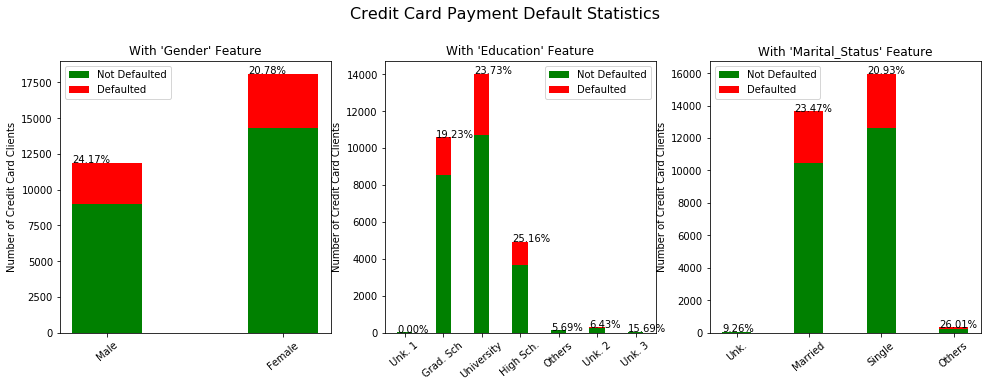

In [8]:
# Import supplementary visualization code visuals.py
import visuals as vs

categorical_plot = ['Gender','Education','Marital_Status']
vs.plot_barchart(data, categorical_plot)

#### Distributions of Continuous Features --

Here we show the distribution of **Credit_Limit**, **Age**, **Bill_Amt1** and **Pay_Amt1** (all 'Bill_Amt' as well as 'Pay_Amt' features have similar distribution).

The distribution of Credit_Limit doesn't show a particular pattern while Age is roughly normal or Gaussian but skewed a little to the right. The Bill_Amt1 looks like a partially normal distribution as most of the data points are greater than zero and skewed to the right. However, there are about 6.4% of the data points are less than zero which means they are overpayments; and some of them are so large (e.g. > NT$20,000) that they should be considered as outliers as mentioned earlier. Pay_Amt1 has similar distribution as Bill_Amt1 but does not have negative values.

These skewed distributions are not good for algorithm training because many algorithms assume the data features are Gaussian distributed. In the later Preprocessing section, we are to transform the continuous data features by using the logarithm function to make them less skewed.

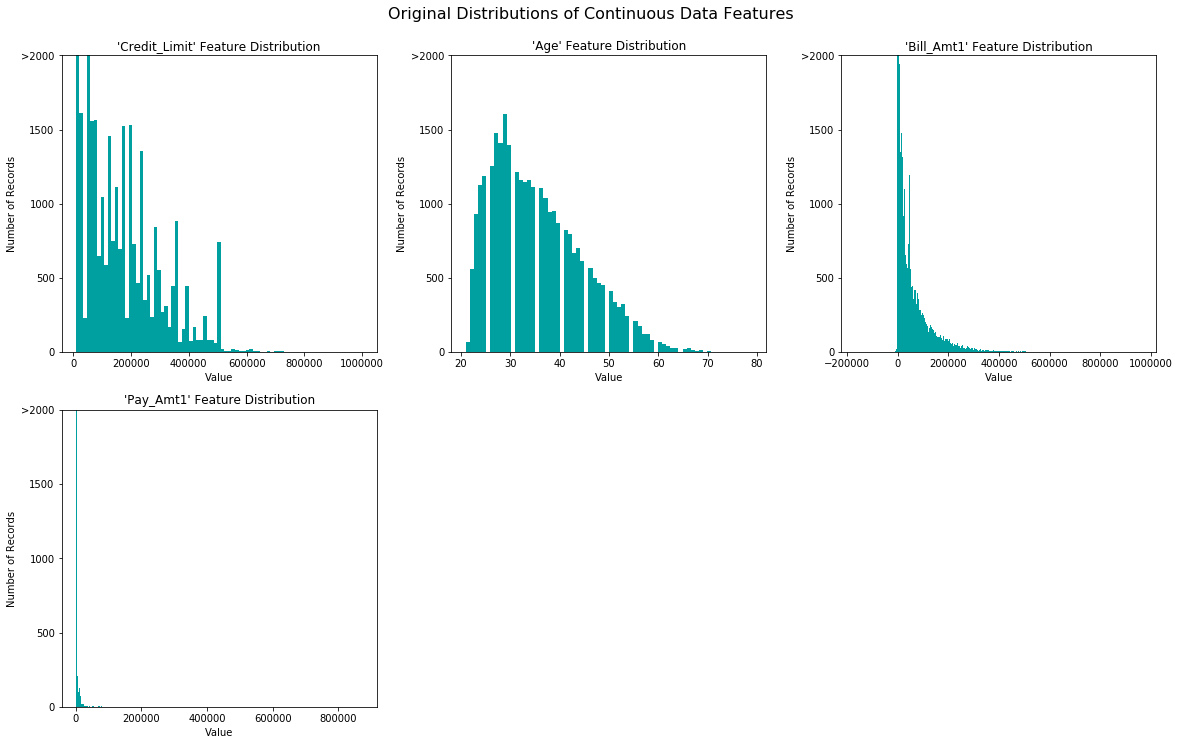

In [9]:
## visualize the distribution of the continuous variables
numerical_plot = ['Credit_Limit','Age','Bill_Amt1','Pay_Amt1']
vs.distribution(data, numerical_plot)

### Algorithms and Techniques

Since we want to predict if a new credit card client would default or not which is a binary classification problem, we are going to train the following four different classification algorithms. Each algorithm is trained using their default parameters and the same dataset which is already loaded earlier. Once the trainings is done, one of the algorithms will be selected based on the performance in the metrics for further tuning.  
  
- **Decision Tree** --  The decision tree algorithm tries to solve a classification problem by using tree representation (see the example below). Each internal node of the tree corresponds to an attribute (e.g. Credit_Limit), and each leaf node corresponds to a class label (e.g "Defaulted"). It works like these:<br>1) Place the best attribute of the dataset at the root of the tree.<br>2) Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.<br>3) Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.<br><br>I select this algorithm because it is simple to understand and interpret. And the tree can be visualised by printing out its decision structure. The major drawbacks of this algorithm are that it is easy to overfit the training data, is unable to handle missing values and sensitive to outliers. Neverthenese, it is a good starting algorithm to use and we can use it to compare with other more complex algorithms. Some parameters and their default value used are as follows:
    - *criterion*: The function to measure the quality of a split. (default='gini')
    - *max_depth*: The maximum depth of the tree. (default=None)
    - *min_samples_split*: The minimum number of samples required to split an internal node (default=2)
    - *min_samples_leaf*: The minimum number of samples required to be at a leaf node (default=1)
<img src="Tree.png" alt="Decision Tree" title="Decision Tree" />

- **SVM (Support Vector Machine)** -- The way SVM classifier works is to find a hyperplane (the grey line below) with the maximum margin that can separate the "Defaulted" and "Not Defaulted" observations (like the green and blue dots in the graph below). Using the hyperplane with the maximum margin would minimize the number of classification errors. We can change the type of hyperplane using the Kernel parameter. To adjust the maximum margins, we use the C parameter.<br><br>I select SVM because it performs well on data with many features like this dataset with 23 features. Another advantage is that it only uses a subset of training points in the decision function (called support vectors), so it is memory efficient. Its drawbacks are that it takes longer time to train and does not directly provide probability estimates. But for this project, the probability estimates are not needed. Parameters used for SVM are:
    - *C*: Penalty parameter for regularization. (default=1.0)
    - *kernel*: Specifies the kernel function to be used in the algorithm. (default='rbf')
    - *gamma*: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. (default='auto') 
<img src="Svm.png" alt="SVM" title="SVM" />

- **Gradient Tree Boosting** -- Gradient Tree Boosting is an ensemble algorithm which consists of multiple weak learners (i.e. decision tree). In this algorithm, the learning procedure consecutively fits new models (trees) to provide a more accurate estimate of the response variable (Defaulted). The principle idea behind this algorithm is to construct the new base-learners to be maximally correlated with the negative gradient of the loss function, associated with the whole ensemble. Its predictive power is high. So it definitely should be included in the trials. There are several parameters we can use for the boosting. In addition, we can also pass the parameters (not listed) particular for the Decision Tree algorithms (the weak learners) inside the ensemble algorithm:
    - *loss*: The loss function to be optimized. (default='deviance')
    - *learning_rate*: The learning rate shrinks the contribution of each tree by learning_rate. (default=0.1)
    - *n_estimators*: The number of weak learners to use. (default=100)

- **Neural Networks** -- A Neural Networks is based on a collection of connected units or nodes called neurons. Each connection between neurons can transmit a signal from one to another (see the graph below). The neuron that receives the signal can process it and then signal neurons connected to it. The signal at a connection between neurons is a real number, and the output of each neuron is calculated by a non-linear function of the sum of its inputs. Neurons and connections typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that only if the aggregate signal crosses that threshold is the signal sent. Typically, neurons are organized in layers, i.e. input layer, hidden layer(s) and output layer. Different layers may perform different kinds of transformations on their inputs. Signals travel from input to the output layer, possibly after traversing the layers multiple times (Wikipedia). Each input neuron receives the input value of a feature (e.g Credit_Limit); and there is only one output neuron for this dataset which is for the response label "Defaulted".<br><br>In his paper 'The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients', professor I-Cheng Yeh concludes that Artificial Neural Networks has the highest predictive accuracy of probability of default with this dataset. So I would like to see if this algorithm can also perform well in classification. The major parameters are listed as below:
    - *hidden_layer_sizes*: (default=100)
    - *activation*: Activation function for the hidden layer. (default='relu')
    - *solver*: The solver for weight optimization. (default='adam')
    - *alpha*: L2 penalty (regularization term) parameter. (default=0.0001)
<img src="Ann.png" alt="Neural Networks" title="Neural Networks" />

### Benchmark
The benchmark model I use for this project is a naive predictor which is simply some statistics from the training data. Since most individual are 'Not Defaulted' (~77%) in the dataset, we could simply point to a credit card client and say 'this client does not default' and generally be right without ever looking at the data about the client. Such a statement is little naive, since we have not considered any information to substantiate the claim. But it is simple, so it is still a good benchmark model we can use to compare to the classifiers I am going to train. The accuracy and F-beta score of this naive predictor are calculated as below:

In [10]:
from sklearn.metrics import accuracy_score, fbeta_score

## Split the data into features and target label
default_raw = data['Defaulted']
features_raw = data.drop('Defaulted', axis = 1)

## Naive Predictor
y_actual = default_raw
# a naive model would predict all labels to be 1
y_predict = np.ones(len(default_raw))
accuracy = accuracy_score(y_actual, y_predict)
fscore = fbeta_score(y_actual, y_predict, beta=0.5)
print("Naive Predictor: [Accuracy score: {:.4f}, F-beta score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2212, F-beta score: 0.2620]


## III. Methodology

### Data Preprocessing

#### Continuous Features Transformation --
Here I transform the numeric continuous features using the logarithm function to make them less skewed. Since the values of some features are negative to which the logarithm function cannot apply, I am going to transform the absolute values of the features and then put the sign back afterwards. 
  
The distribution of some transformed features are shown below after the process:

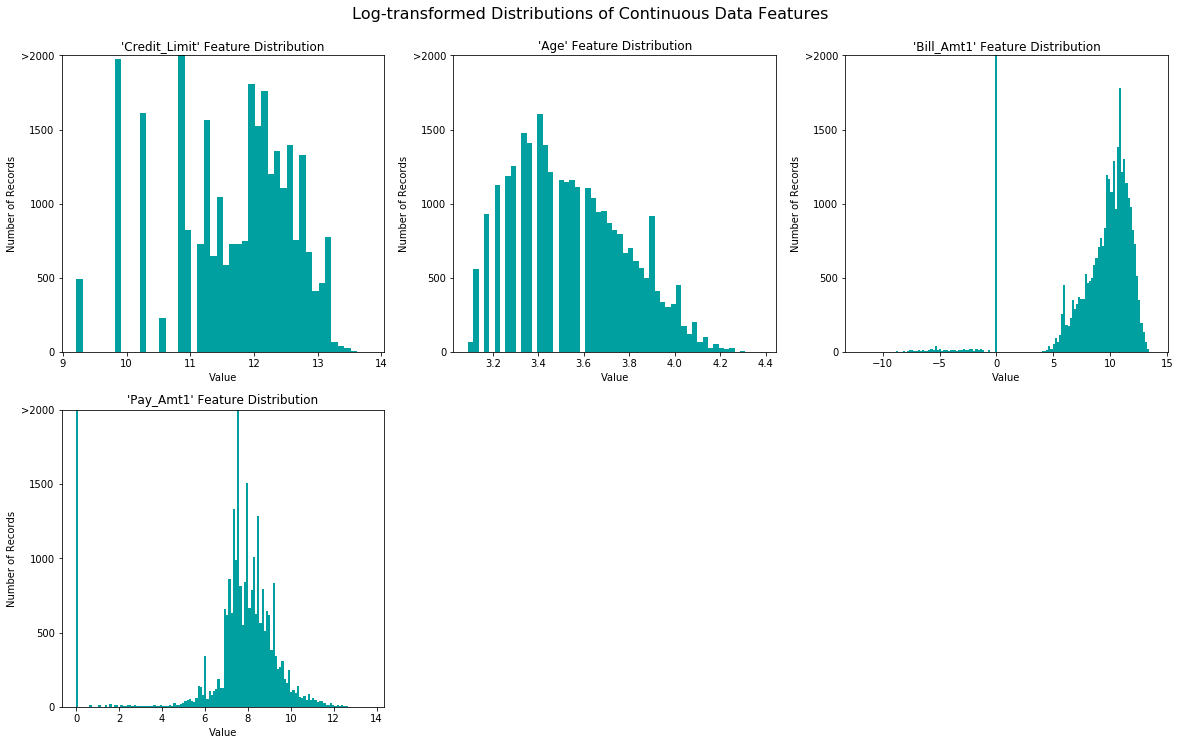

In [11]:
numerical = ['Credit_Limit','Age','Bill_Amt1','Bill_Amt2','Bill_Amt3','Bill_Amt4','Bill_Amt5','Bill_Amt6',
             'Pay_Amt1','Pay_Amt2','Pay_Amt3','Pay_Amt4','Pay_Amt5','Pay_Amt6']

## Log-transform the skewed features
features_raw[numerical] = data[numerical].apply(lambda x: np.sign(x)*np.log(abs(x) +1))
    
# Visualize the new log distributions
vs.distribution(features_raw[numerical], numerical_plot, transformed = True)

As you can see the new distributions above, the continuous features are less skewed and more normally distributed now, especially the ones for Bill_Amt1 and Pay_Amt1.  
  
#### Outliers Removal --
As mentioned in the data exploration section, there are around 6.4% of the data points have overpayments in the Bill_Amt columns. Some of them are too large to be believed they are true overpayments. We consider those as outliers or invalid data. And I want to clean them up here by using the 6.4% as an estimate for the outliers percentage rate.

In [12]:
## Remove outliers

from sklearn import svm
# nu is defined and calculated in the Outliers section and its value is 6.4%
clf = svm.OneClassSVM(nu= nu, kernel="rbf", gamma=0.00005, random_state=12)
clf = clf.fit(features_raw)
# get the indexes of the rows those are ruled out as outliers
indexes_no_outliers = clf.predict(features_raw) == 1
features_raw = features_raw[indexes_no_outliers] 
default_raw = default_raw[indexes_no_outliers]
n_outliers = n_records - features_raw.shape[0]

print("Shape of the features matrix after removing the outliers: {}".format(features_raw.shape))

Shape of the features matrix after removing the outliers: (28068, 23)


So the code above removed 1932 rows from the original dataset. Please note that those 1932 rows are not necessarily the ones with large overpayments. They are just the ones detected as outliers by the algorithm **OneClassSVM** using its own criteria.  
 
#### Feature Scaling --
Since SVM and Neual Networks algorithm are sensitive to feature scaling, all the numeric features in the dataset is scaled to between 0 and 1 here so that no large-scaled features, such as **Credit_Limit** would dominate the prediction. 

In [13]:
from sklearn.preprocessing import MinMaxScaler

## Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])
## Show an example of record with scaling applied
display(features_raw.head(n = 1))

,Credit_Limit,Gender,Education,Marital_Status,Age,Repay_Status1,Repay_Status2,Repay_Status3,Repay_Status4,Repay_Status5,...,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6
1,0.158172,2,2,1,0.103117,2,2,-1,-1,-2,...,0.70692,0.411676,0.406723,0.457945,0.0,0.508233,0.0,0.0,0.0,0.0


#### Categorical Feature Encoding --
Although the categorical features, such as **Education** are already in numeric form, the values themselves do not have ordinal relationship. So we need to use **One-hot encoding** to transform those features.

In [14]:
categorical = ['Gender','Education','Marital_Status','Repay_Status1','Repay_Status2',
               'Repay_Status3','Repay_Status4','Repay_Status5','Repay_Status6']
# One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw, columns = categorical)
# Print the number of features after one-hot encoding
encoded = list(features.columns)
print(f"{len(encoded)} total features after one-hot encoding.")
print()
# Show the encoded feature names
print(encoded)

82 total features after one-hot encoding.

['Credit_Limit', 'Age', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6', 'Gender_1', 'Gender_2', 'Education_0', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Marital_Status_0', 'Marital_Status_1', 'Marital_Status_2', 'Marital_Status_3', 'Repay_Status1_-2', 'Repay_Status1_-1', 'Repay_Status1_0', 'Repay_Status1_1', 'Repay_Status1_2', 'Repay_Status1_3', 'Repay_Status1_4', 'Repay_Status1_5', 'Repay_Status1_6', 'Repay_Status2_-2', 'Repay_Status2_-1', 'Repay_Status2_0', 'Repay_Status2_1', 'Repay_Status2_2', 'Repay_Status2_3', 'Repay_Status2_4', 'Repay_Status2_5', 'Repay_Status2_6', 'Repay_Status3_-2', 'Repay_Status3_-1', 'Repay_Status3_0', 'Repay_Status3_1', 'Repay_Status3_2', 'Repay_Status3_3', 'Repay_Status3_4', 'Repay_Status3_5', 'Repay_Status3_6', 'Repay_Status4_-2', 'Repay_Status4_-1', 'Repay_Status4_

#### Dimensionality Reduction --

The 82 features above are not necessarily relevant to the reponse variable **Defaulted**. So we want to further transform those features and select the useful ones for model training.  
  
Here we use the **Principal Component Analysis (PCA)** to tranform the original features into a new set of features called **principal components**. The new features are uncorrelated with each other and have different explained variance contributing to the predictive power.  
  
In order to reduce the training time and the complexity of models I am going to train, I only pick the first 25 new features (principal components) with the highest explained variance from the transformed dataset. In other words, the dimensionality of the dataset is to reduce from 82 to 25. The sum of the explained variance from those 25 features still maintain about 96% of the total explained variance. So the reduction in the dimensionality would have very little impact on the predictive power of the 
models, but they would be simpler.

In [15]:
from sklearn.decomposition import PCA

# keep only the 25 components with the most explained variance
n_components = 25
pca = PCA(n_components= n_components, random_state= 12).fit(features)
var_ratios ='[' + ', '.join(['{:.2%}'.format(v) for v in pca.explained_variance_ratio_.tolist()]) + ']'

print("Explained variance ratios for first {} principal components:\n{}\n".format(n_components, var_ratios))
print("Total explained variance by first {} principal components: {:0.2%}".format(n_components, pca.explained_variance_ratio_.sum()))

features = pca.transform(features)

Explained variance ratios for first 25 principal components:
[25.81%, 11.23%, 8.81%, 8.07%, 7.36%, 5.91%, 4.24%, 3.35%, 2.88%, 2.55%, 2.27%, 1.78%, 1.55%, 1.40%, 1.28%, 1.12%, 1.04%, 0.98%, 0.90%, 0.81%, 0.73%, 0.57%, 0.54%, 0.47%, 0.43%]

Total explained variance by first 25 principal components: 96.07%


#### Dealing with Imbalanced Data --
As mentioned in the data exploration section, there are only 22.12% of the data points of which label is 'Defaulted'. So training with this dataset would make the algorithm tend to predict 'Not Defaulted'. In order to make the algorithms be better able to learn patterns that differentiate classes, I am going to oversample the minority class (Defaulted) observations in the data to make the number of "Defaulted" and "Not Defaulted" be more balanced. The technique I use here is called **SMOTE (Synthetic Minority Oversampling Technique)**.

In [16]:
## Oversampling with SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split the data into a training-validation set and a test set. The test set is used to test the final model
x_train_val, x_test, y_train_val, y_test = train_test_split(features, default_raw, test_size=.25, random_state=12)
# further split the training-validation set into a training set and a validation set 
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = .25, random_state=12)
# oversample the minority class in the training data
sm = SMOTE(random_state=12, ratio = 'auto')
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

n_default_res = y_train_res[y_train_res == 1].shape[0]
# Percentage of individuals who defaulted
default_res_percent = float(n_default_res)/float(y_train_res.size)*100

print("No. of samples in each subset after SMOTE: training = {}, validation = {}, testing= {}"
      .format(x_train_res.shape[0], x_val.shape[0], x_test.shape[0]))
print("% of individuals who are defaulted in the training set after SMOTE: {:.2f}%".format(default_res_percent))

No. of samples in each subset after SMOTE: training = 24818, validation = 5263, testing= 7017
% of individuals who are defaulted in the training set after SMOTE: 50.00%


### Implementation

The coding process for this implementation is not complicated. But I need to train four different algorithms, and they all need to go through the same process pipeline so that I can compare them. In order to make the code cleaner and reusable, I wrote the following function to train an algorithm and report its performance in the metrics. To use this function, I just need to pass a classifier and the required datasets (training and validation) to it, and then run it. This step is repeat for each classifier until all are done.

#### Defining Function for Train and Predict --


In [17]:
def train_predict(learner, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: defaulted training set
       - X_val: features validation set
       - y_val: defaulted validation set
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the training and validation set,
    start = time() # Get start time
    predictions_train = learner.predict(X_train)
    predictions_val = learner.predict(X_val)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
                    
    # Compute accuracy on the validation and test set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_val'] = accuracy_score(y_val, predictions_val)
            
    # Compute F-score on the validation and test set
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5)
       
    # Success
    print("\n{} training results:".format(learner.__class__.__name__))
    print("\n\tTraining time: {}".format(results['train_time']))
    print("\n\tPrediction time: {}".format(results['pred_time']))
    print("\n\tTraining accuracy: {}".format(results['acc_train']))
    print("\n\tTraining F-beta score: {}".format(results['f_train']))
    print("\n\tValidation accuracy: {}".format(results['acc_val']))
    print("\n\tValidation F-beta score: {}".format(results['f_val']))
   

#### Training Algorithms with Default Parameters --

Here I train the four algorithms, namely **Decision Tree**, **SVM**, **Gradient Tree Boosting** and **Neural Networks** with the function defined above, and reports the metric results for each one of them. No custom tuning parameters are passed to the algorithms so that I can get a quick evaluation on them.

In [18]:
from time import time
from sklearn import tree, svm, ensemble
from sklearn.neural_network import MLPClassifier

# initialize the models
clf_A = tree.DecisionTreeClassifier(random_state=12)
clf_B = svm.SVC(random_state=12)
clf_C = ensemble.GradientBoostingClassifier(random_state=12)
clf_D = MLPClassifier(random_state=12)
# train the algorithms one by one and predict the outcome on the validation set
for clf in [clf_A, clf_B, clf_C, clf_D]:
    train_predict(clf, x_train_res, y_train_res, x_val, y_val)


DecisionTreeClassifier training results:

	Training time: 1.7237896919250488

	Prediction time: 0.015625476837158203

	Training accuracy: 0.9997179466516238

	Training F-beta score: 0.9998871277230437

	Validation accuracy: 0.7079612388371651

	Validation F-beta score: 0.3843327454438566

SVC training results:

	Training time: 38.184800148010254

	Prediction time: 22.903084754943848

	Training accuracy: 0.7175437182689983

	Training F-beta score: 0.7405283595903503

	Validation accuracy: 0.7871936158084742

	Validation F-beta score: 0.5310921717171717

GradientBoostingClassifier training results:

	Training time: 9.654988288879395

	Prediction time: 0.06250143051147461

	Training accuracy: 0.7415585462164558

	Training F-beta score: 0.7581420181526962

	Validation accuracy: 0.7700931027930837

	Validation F-beta score: 0.5058139534883721

MLPClassifier training results:

	Training time: 21.323985815048218

	Prediction time: 0.0670478343963623

	Training accuracy: 0.807478443065517

	T

#### Evaluations of the Trained Models --

By looking at the metric results above, **Decision Tree** has a very high accuracy and F-beta score on the training set. Both are close to the perfect score 1, but it performs poorly on the validation (0.71 in accuracy and 0.38 in F-beta score). I think it is because the **Decision Tree** model is overfitting the training data.  
  
The **SVM**, **Gradient Tree Boosting(GTB)** and **Neural Networks** models have similar performance in the validation but the **SVM** model performs a little better than the others.  
  
Based on the validation results, I select the **SVM** model for further refinement as it not only has a better metric scores but also has less parameters (about 3) to tune. It does take longer time to train and predict. But since the dataset is relatively small (about 30000 rows), the training time is not an issue. 
  
### Refinement

#### Finding Best Parameters for the Selected Model --

In this section, we add the 'bagging' technique to the seleted SVM model. In this way, multiple SVM models (e.g. 10) are trained on different subsets randomly selected from the dataset with replacement (i.e. some samples can be repeated in the subsets); and then aggregate their individual predictions to form a final prediction. The overall performance of the bagging model (i.e. **BaggingClassifier**) is expected to be better.
  
Also, we are going to use 'randomized search' technique to find the best parameters for this model.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingClassifier
import scipy

def fine_tune_SVM_model(X_train, y_train, X_val, y_val):
    '''
    inputs:
       - X_train: features training set
       - y_train: defaulted training set
       - X_val: features validation set
       - y_val: defaulted validation set
    '''

    # Initialize the classifier
    n_estimators = 10
    clf = BaggingClassifier(svm.SVC(random_state= 12), max_samples=1.0/n_estimators, n_estimators= n_estimators, random_state=12)

    # Create the parameters list
    parameters = {'base_estimator__C': scipy.stats.expon(scale=2),
                  'base_estimator__gamma': scipy.stats.expon(scale=.02),
                  'base_estimator__class_weight':['balanced', None]
                 }

    # Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score, beta= 0.5)

    # Perform randomized search on the classifier using 'scorer' as the scoring method and 10-folds cross validation
    search_obj = RandomizedSearchCV(clf, param_distributions= parameters, scoring=scorer, cv=10,
                                  n_jobs=-1, error_score=0, n_iter=1, random_state=12)

    # Fit the randomized search object to the training data and find the optimal parameters
    search_fit = search_obj.fit(X_train, y_train)
    print("Best parameters: ", search_fit.best_params_)
    print()

    # Get the estimator
    best_clf = search_fit.best_estimator_

    # Make predictions using the unoptimized and optimized model
    predictions = (clf.fit(X_train, y_train)).predict(X_val)
    best_predictions = best_clf.predict(X_val)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
    print("F-beta score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
    print("F-beta score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))

    return best_clf

best_clf = fine_tune_SVM_model(x_train_res, y_train_res, x_val, y_val)

Best parameters:  {'base_estimator__C': 0.33485684597179971, 'base_estimator__class_weight': 'balanced', 'base_estimator__gamma': 0.041332425856238038}

Unoptimized model
------
Accuracy score on validation data: 0.7990
F-beta score on validation data: 0.5507

Optimized Model
------
Accuracy score on validation data: 0.8071
F-beta score on validation data: 0.5630


## IV. Results

### Model Evaluation and Validation
The final model selected for this project is a **BaggingClassifier** with the following parameters:  
- *base estimator*: SVM classifier
- *C*: 0.33485684597179971
- *class_weight*: 'balanced'
- *gamma*: 0.041332425856238038
  
To further evaluate this final model, it is tested again here with the test set created in the "Dealing with Imbalanced Data" section. The test set has never been used during the training and validation stages. So it is good for testing the model as the "unseen data". 

In [20]:
final_best_predictions = best_clf.predict(x_test)

print("Accuracy score on unseen test data: {:.4f}".format(accuracy_score(y_test, final_best_predictions)))
print("F-beta score on unseen test data: {:.4f}".format(fbeta_score(y_test, final_best_predictions, beta = 0.5)))

Accuracy score on unseen test data: 0.8016
F-beta score on unseen test data: 0.5473


As you can see the metric results of the test set, the accuracy and F-beta score are very close to the ones of the validation set. In other words, the final model generalizes well to the unseen data.  
  
### Justification
Early in the "Benchmark" section, I defined a "naive predictor" of which the accuracy score is 0.2212 and the F-beta score is 0.2620. The accuracy score tells us that a credit card client would have 22% chance to default and 78% chance to not default. With the final optimized model, the accuracy score is about 80% which is much higher than the default chance of the "naive predictor". However it is just a little better when we predict a client who will not default. Other than the accuracy score, the final model has a better F-beta score of 0.5630. So overall the final model is still better than the naive model.  
  
Although the final model is better than the naive model, it is not really a solution to the problem as its F-beta score is still quite low (perfect score is 1.0). Its 80% accuracy is also not good enough for practical use. I think the main reason why its metric scores are low is because the features of the dataset do not have much correlation with the response label (defaulted or not defaulted). If you look at the explained variances from the principal components listed in the Feature Transformation section, the best component (the first one) has only about 26% explained variance. The other components have even much lower variance. In the later section, I am going to bring up some areas we can explore to see if we can further improve the model.

## V. Conclusion


### Free-Form Visualization
In this section, a Receiver Operating Characteristics (ROC) curve is plotted for the final test data used above. The area under the curve (AUC) which is **0.72** is printed out with the curve as well. The blue dashed line represents a model with random guessing (AUC=0.5). The AUC for a perfect model is 1.0. So 0.72 is still a good score for this model.

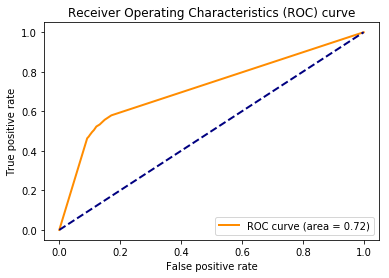

In [21]:
y_pred_proba = best_clf.predict_proba(x_test)[:, 1]
vs.plot_roc(y_test, y_pred_proba)

### Reflection
#### Project Sumary --
Here is the summary of the whole process used for this project:
1. Problem definition: define a problem to solve, give an overview of the project and define metrics to evaluate the solution.
2. Data loading: load the dataset from the UCI Repository web site.
3. Data exploration: try to understand the structure of the dataset by printing out some sample records and statistics of the features; look into the anormalities of the data, such as imbalanced data, missing values and outliers; and plot out the visualizations of some typical features.
4. Defining algorithms and technologies used: select Decision Tree, SVM, Gradient Tree Boosting and Neural Networks as the initial learning algorithms; and define a naive model as a benchmark for the final selected model.
5. Data preprocessing: process the data with these steps - transform some features using logarithm; remove outliers; feature scaling for the continuous numeric features; transform and encode the categorical features using One-hot Encoding; reduce the dimensionalities of the dataset using Principal Component Analysis; and finally deal with the imbalanced data with SMOTE.
6. Implementation: run the four algorithms against the dataset and print out the metric results.
7. Evaluate trained models: compare the trained models by their performance in the metrics and select one for further refinement.
8. Tuning the final model: fine-tune the selected model using randomized search for the best hyperparameters.
9. Evaluate the final model: run the model against an unseen test set and compare it with the benchmark model.
10. Final visualization of the selected model: plot a ROC curve to see how it performance in this metric.

#### Interesting and difficult aspects in the project --
The most interesting aspect in this project I found was to see if the data of  the credit card clients' profiles can be used to predict if a client would default his/her next payment. I think if I can come up with a very good model, it would be useful in real life. Unfortunately, the dataset doesn't seem have enough information about the payment default because the default rate is low and no feature has particular high variance we can use to make prediction.


### Improvement
As I mentioned in the sections above, the performance of the final model in the metrics does not look good enough in a production environemnt with 80% accuracy and 0.56 in the F-beta score. I think there are several ways we can improve the performance:
- Get more data and features from somewhere - if we can get a dataset with better quality, the predictive power of the model could be higher.
- Use different algorithms - I think the algorthms I used were good but there may be some other algorithms can do even better job on this dataset. Deep Learning is the one I may want to try in the future.
- Try different ways to search for the best parameters - the parameters I received from the randomized search may not be the best ones if the model was stuck in a local maximum. So we can try different ways to do the search or include more parameters in the tuning. However, doing these would take time and effort, but this is always the area we should try in order to improve the model.
- Use different ways to handle the features - we can try feature selection or a different feature extraction technique, such as Linear Discriminant Analysis (LDA) to see if we can improve the quality of the features.
